# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters on the perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Write K means function 

import required libraries 

In [21]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
    

In [43]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
    k=Cluster_Centroids.shape[0] #get number of clusters
    if Distance_Type =='euclidean':
        # --------My basic approach---------
        # dist=np.empty((Data_points.shape[0],k))
        # for i in range(k):
        #     dist[:,i]=np.sqrt(np.sum((Data_points-Cluster_Centroids[i])**2),axis=1)
        Cluster_Distance = np.sqrt(np.sum((Data_points[:, np.newaxis] - Cluster_Centroids) ** 2, axis=-1))    
    else:
         mean_Data_points = np.mean(Data_points, axis=1, keepdims=True)
         mean_Cluster_Centroids = np.mean(Cluster_Centroids, axis=1, keepdims=True)
         for i in range(k):
            # Calculate Pearson correlation coefficients between each data point and each cluster centroid
            num = np.dot(Data_points - mean_Data_points, (Cluster_Centroids[i] - mean_Cluster_Centroids[i]).T)
            deno = np.sqrt(np.sum((Data_points - mean_Data_points)**2, axis=1, keepdims=True) * np.sum((Cluster_Centroids[i] - mean_Cluster_Centroids[i])**2, axis=1))
            correlation_coefficients = num / deno
            Cluster_Distance[:,i] = 1 - correlation_coefficients
    return Cluster_Distance 



In [24]:
# a=np.random.randn(2,3)
# b=np.random.randn(5,3)
# dist=np.empty((a.shape[0],3))
# for i in range(3):
#      dist[:,i]=np.sqrt(np.sum((a-b[i])**2,axis=1))
# dist           


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [25]:
class Result():
    def __init__(self, labels, centers):
        self.labels_ = labels
        self.cluster_centers_ = centers

# One is an array with indices (which cluster does this data point belong to)
# This'll be your "labels"

# And one array with el final centroids le kol cluster.
# This'll be your "centers"        

In [63]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
      
      Cluster_Centroids = Data_points[np.random.choice(Data_points.shape[0], Number_of_Clusters, replace=False)]#intial 
      # # Cluster_Distance= GUC_Distance( Cluster_Centroids,Data_points,  Distance_Type) 
      # Cluster_Assignment (Data_points, Cluster_Centroids)
      mean_square_distances = np.zeros(Cluster_Centroids.shape[0])
      distortion=0.0
      while True:
            distances = GUC_Distance(Data_points, Cluster_Centroids, Distance_Type)
            cluster_assignments =Cluster_Assignment(Data_points, Cluster_Centroids,Distance_Type) #get indices of min. distance
            # min_dist_value=distances.flat(cluster_assignments) #get teh values of min. distance

            MSE_old=MSE_Distance(Data_points, Cluster_Centroids, cluster_assignments)
            updated_centroid=Update_centroid(Data_points, Cluster_Centroids, cluster_assignments)
            MSE_new=MSE_Distance(Data_points, updated_centroid, cluster_assignments)
            
            if np.array_equal(MSE_old,MSE_new):
                  break
            
            Cluster_Centroids=updated_centroid[0]
            distortion=updated_centroid[1]

      Cluster_Metric=distortion      
      Final_Cluster_Distance =Result(cluster_assignments, Cluster_Centroids)
      return [ Final_Cluster_Distance , Cluster_Metric ]   

def Cluster_Assignment (Data_points, Cluster_Centroids,Distance_Type):
      distances = GUC_Distance(Data_points, Cluster_Centroids, Distance_Type)
      cluster_assignments = np.argmin(distances, axis=1)
      
      return cluster_assignments
      
def MSE_Distance(Data_points, Cluster_Centroids, cluster_assignments):
      mean_square_distances = np.zeros(len(Cluster_Centroids))
      # for i, centroid in enumerate(Cluster_Centroids):
      #       assigned_indices = np.where(cluster_assignments == i)[0]
      #       if len(assigned_indices) > 0:
      #             mean_square_distances[i] = np.mean(np.sum((Data_points[assigned_indices] - centroid)**2, axis=1))
      for i in range (len(Cluster_Centroids)):
            cluster_assigned_indices=np.where(cluster_assignments==i)[0]
            if len(cluster_assigned_indices)>0:
                  mean_square_distances[i]=np.mean(np.sum((Data_points[cluster_assigned_indices]-Cluster_Centroids[i])**2,axis=1))  
      
      return mean_square_distances 

def Update_centroid(Data_points, Cluster_Centroids, cluster_assignments):
      updated_centroid = np.zeros_like(Cluster_Centroids)
      distortion=0.0
      for i in range (len(Cluster_Centroids)):
            cluster_assigned_indices=np.where(cluster_assignments==i)[0]
            if len(cluster_assigned_indices)>0:
                  updated_centroid[i]=np.mean(Data_points[cluster_assigned_indices],axis=0)  
                  distortion += np.sum((Data_points[cluster_assigned_indices] - Cluster_Centroids[i])**2)
      
      return [updated_centroid ,distortion] 

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [32]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [65]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,20],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

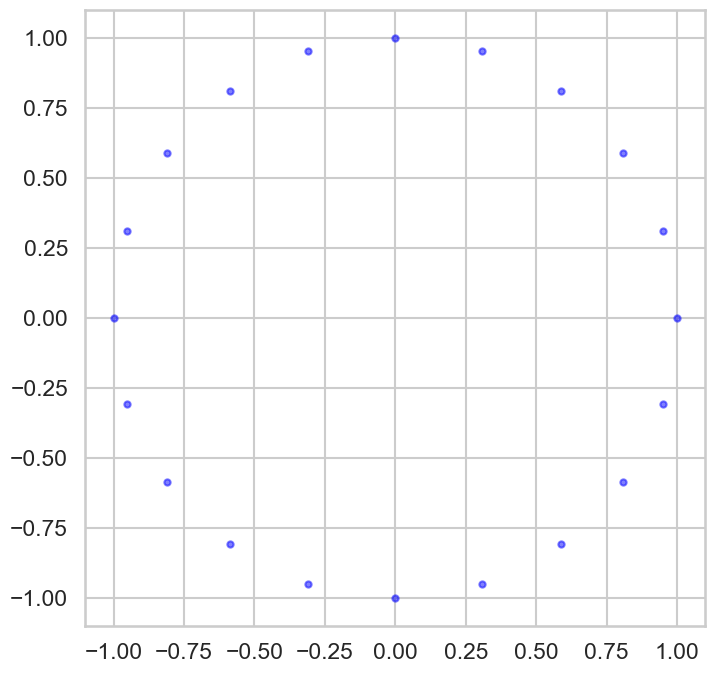

In [34]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

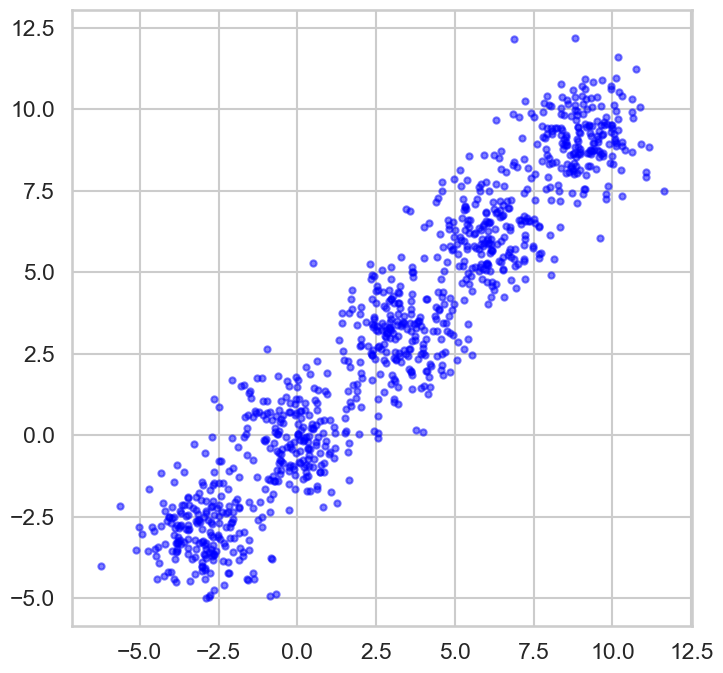

In [30]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

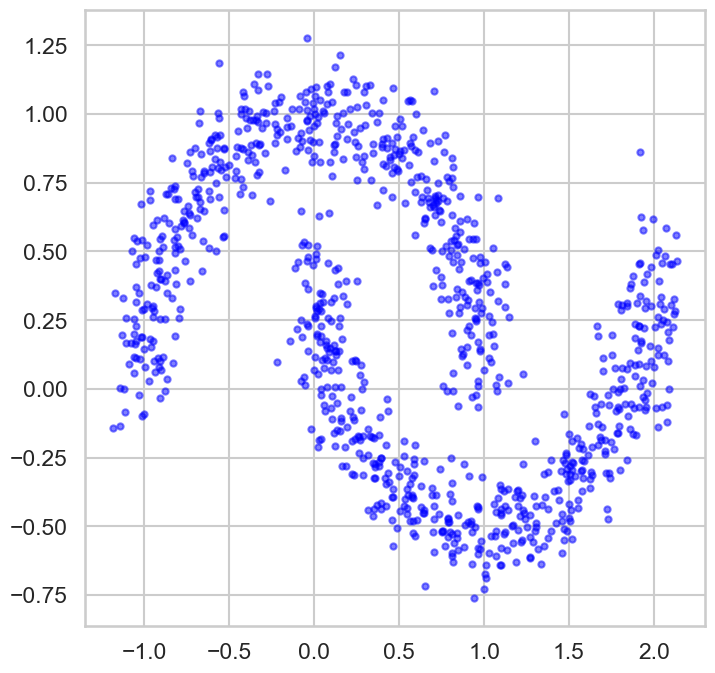

In [31]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [66]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
metrics = []
for num_clusters in range(2,11):
    fig = plt.figure()
    Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X, num_clusters, 'euclidean')
    metrics.append(Cluster_Metric)
    display_cluster(X, km=Final_Cluster_Distance, num_clusters=num_clusters)
    fig.suptitle(f"K-Means with K = {num_clusters}")
    fig.tight_layout()
plt.figure()
plt.plot(np.arange(2,11), metrics)
plt.title("Sum of Squares (SSE)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Error")
plt.tight_layout()
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 